<a href="https://colab.research.google.com/github/DiFedorchuk/ML_Course/blob/main/HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделі близькими до ваших найкращих припущень?

In [40]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
medical_df = pd.read_csv("/content/drive/MyDrive/Courses/Machine Learning/medical-charges.csv")
non_smoker_df = medical_df[medical_df.smoker == 'no']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [3]:
non_smoker_df.describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# 1. Метод НМК
def normal_equations(X,y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

X = non_smoker_df.age
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
y = non_smoker_df.charges
MNK_coefs = normal_equations(X_with_intercept, y)
print('Коефіцієнти НМК: ', MNK_coefs)
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

Коефіцієнти НМК:  [-2091.42055657   267.24891283]


In [19]:
# Прогнози моделі
predictions_MNK[:10]

array([ 2719.0598744 ,  5391.54900271,  6727.79356686,  6460.54465403,
        6193.2957412 , 10202.02943367,  7796.78921819,  7796.78921819,
       13943.51421331,  4589.80226421])

In [20]:
# точність прогнозу RMSE
rmse_mnk = np.sqrt(np.mean((y - predictions_MNK)**2))
print(f'RMSE для МНК: {rmse_mnk:.2f}')

RMSE для МНК: 4662.51


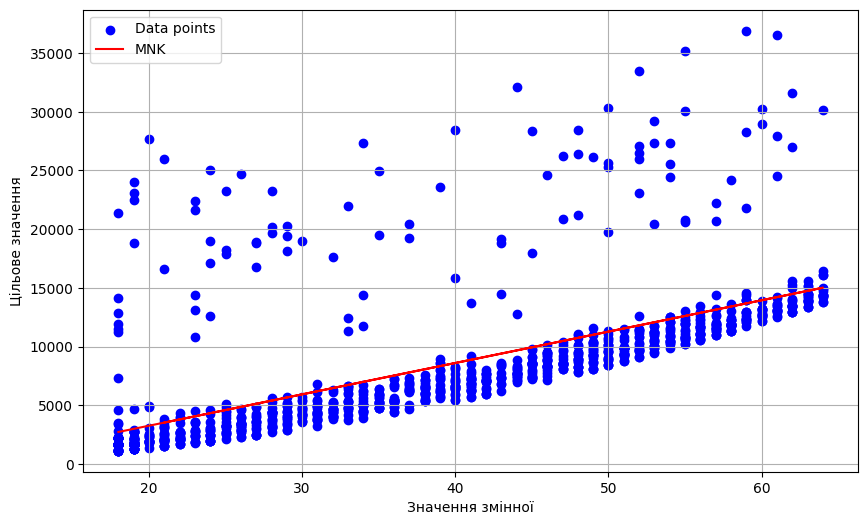

In [21]:
# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.01, epochs=1000):
  mean = X[:, 1].mean()
  std = X[:, 1].std()
  X[:, 1] = (X[:, 1] - mean)/ std
  m, b = 0.0, 0.0
  n = len(y)
  errors = []

  for _ in range(epochs):
    y_pred = m * X[:, 1] + b
    error = y_pred - y
    errors.append(np.mean(error ** 2))
    m_gradient = (2/n) * np.dot(error, X[:, 1])
    b_gradient = (2/n) * np.sum(error)
    m -= lr * m_gradient
    b -= lr * b_gradient
  return m, b, errors

m, b, errors = full_batch_gradient_descent(X_with_intercept, y, lr=0.001, epochs=1000)

predictions_fbgd =  m * X_with_intercept[:, 1] + b
rmse_fbgb = np.sqrt(np.mean((predictions_fbgd - y)**2))

In [10]:
predictions_fbgd[:20], rmse_fbgb

(array([ 2351.81135096,  4663.34201141,  5819.10734164,  5587.95427559,
         5356.80120955,  8824.09720022,  6743.71960582,  6743.71960582,
        12060.24012486,  3969.88281327,  3507.57668118, 11135.62786068,
         2582.964417  , 10211.0155965 ,  3507.57668118, 11135.62786068,
        12060.24012486,  5125.6481435 ,  2351.81135096,  6743.71960582]),
 np.float64(4826.473740471969))


Learning rate = 0.001
b = 7295.098, m = 3253.893
RMSE = 4826.47

Learning rate = 0.01
b = 8434.268, m = 3762.007
RMSE = 4662.51

Learning rate = 0.1
b = 8434.268, m = 3762.007
RMSE = 4662.51


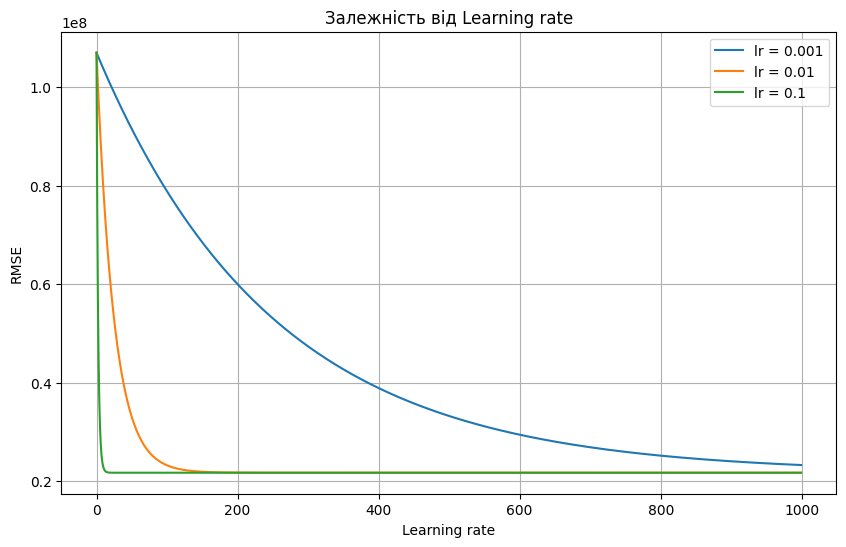

In [25]:
# Тестуємо різні lr
learning_rates = [0.001, 0.01, 0.1]
results = {}
for lr in learning_rates:
  m, b , errors = full_batch_gradient_descent(X_with_intercept, y, lr=lr, epochs=1000)
  mean = X_with_intercept[:, 1].mean()
  std = X_with_intercept[:, 1].std()
  X_pred = X_with_intercept.copy()
  X_pred[:, 1] = (X_pred[:, 1] - mean)/ std
  predict = m * X_pred[:, 1] + b
  rmse = np.sqrt(np.mean((predict - y)**2))
  results[lr] = (m, b, errors)
  print(f"\nLearning rate = {lr}")
  print(f"b = {b:.3f}, m = {m:.3f}")
  print(f"RMSE = {rmse:.2f}")

# графік помилки  в залежності від ітерації
plt.figure(figsize=(10,6))
for lr in learning_rates:
    plt.plot(results[lr][2], label=f"lr = {lr}")

plt.xlabel("Learning rate")
plt.ylabel("RMSE")
plt.title("Залежність від Learning rate")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
!pip install scikit-learn --quiet

In [29]:
from sklearn.linear_model import LinearRegression
X = non_smoker_df[['age']]
y = non_smoker_df[['charges']]
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
rmse = np.sqrt(np.mean((y_pred - y) ** 2))
print("b =", model.intercept_," ", "m = ", model.coef_[0])
print(f"RMSE = {rmse:.2f}")
print(y_pred[:10])

b = [-2091.42055657]   m =  [267.24891283]
RMSE = 4662.51
[[ 2719.0598744 ]
 [ 5391.54900271]
 [ 6727.79356686]
 [ 6460.54465403]
 [ 6193.2957412 ]
 [10202.02943367]
 [ 7796.78921819]
 [ 7796.78921819]
 [13943.51421331]
 [ 4589.80226421]]


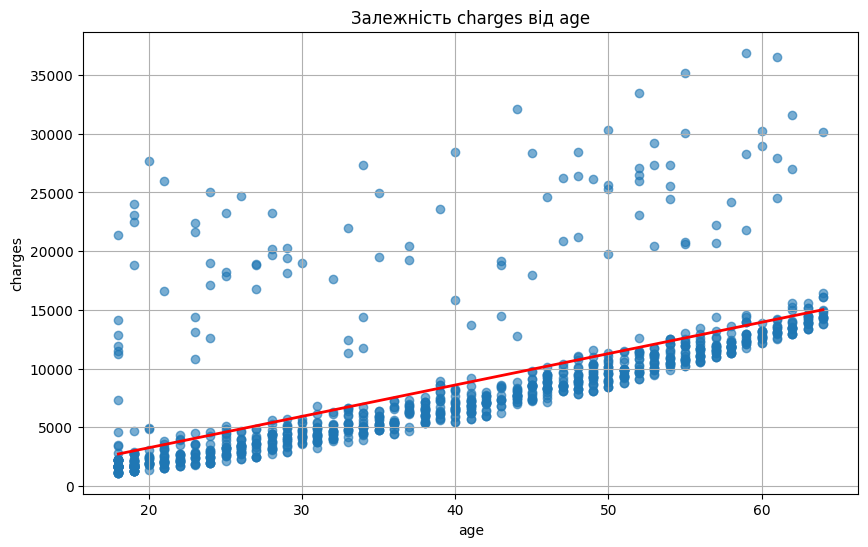

In [35]:
# Графік LinearRegression
idx = np.argsort(X.values.flatten())
X_sorted = X.values[idx]
y_pred_sorted = y_pred[idx]
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2)

plt.xlabel("age")
plt.ylabel("charges")
plt.title("Залежність charges від age")
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


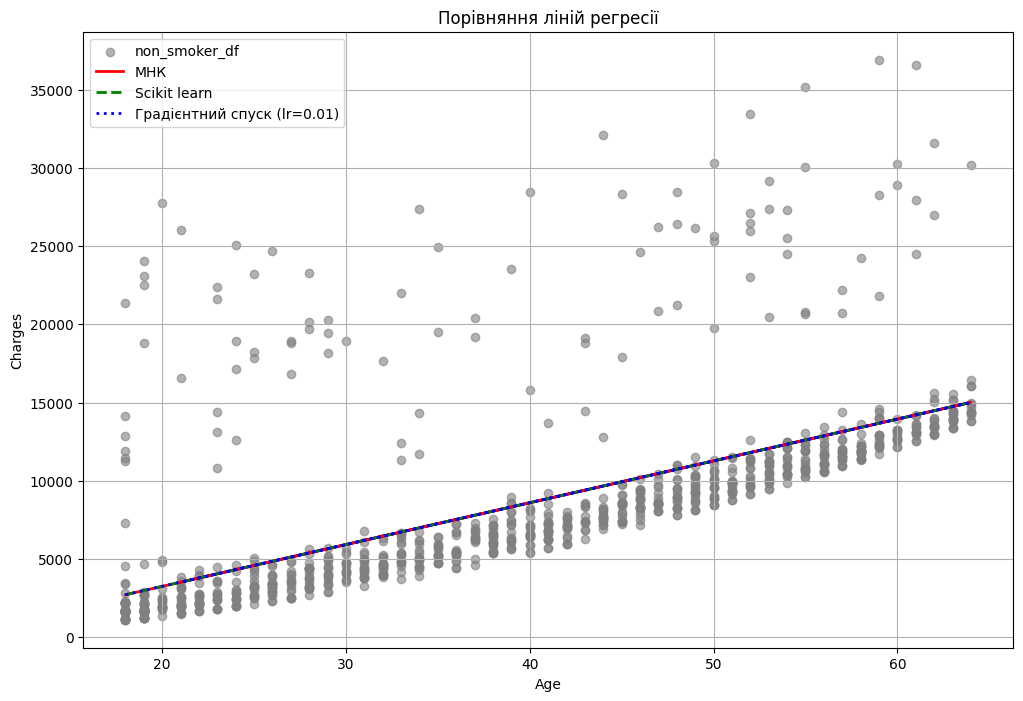

In [38]:
# Графік age проти charges в вигляді діаграми розсіювання і всі три лінії регресії,
# знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим)
plt.figure(figsize=(12, 8))
plt.scatter(non_smoker_df.age, non_smoker_df.charges, color='grey', alpha=0.6, label='non_smoker_df')
# MNK
plt.plot(non_smoker_df.age, predictions_MNK, color='red', label='МНК', linewidth=2)

# full_batch_gradient_descent (lr=0.01)
gd_best_lr = 0.01
m_scaled_gd = results[gd_best_lr][0]
b_scaled_gd = results[gd_best_lr][1]

# Scikit learn LinearRegression
X_sklearn_sorted = np.sort(X.values.flatten())
y_pred_sklearn_sorted = model.predict(X_sklearn_sorted.reshape(-1, 1))
plt.plot(X_sklearn_sorted, y_pred_sklearn_sorted, color='green', label='Scikit learn', linewidth=2, linestyle='--')

# Початкове mean та std для Age
original_mean_age = non_smoker_df.age.mean()
original_std_age = non_smoker_df.age.std()

m_gd_original_scale = m_scaled_gd / original_std_age
b_gd_original_scale = b_scaled_gd - m_scaled_gd * original_mean_age / original_std_age

# Generate predictions for plotting on the original scale
predictions_GD_plot = m_gd_original_scale * non_smoker_df.age + b_gd_original_scale
plt.plot(non_smoker_df.age, predictions_GD_plot, color='blue', label='Градієнтний спуск (lr=0.01)', linewidth=2, linestyle=':')

plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Порівняння ліній регресії')
plt.legend()
plt.grid(True)
plt.show()

Висновок: За результатами RMSE бачимо що лінії моделей за методами МНК, градієнтний спуск та  Scikit learn є схожими, майже ідентичними.
Дані методи допомогли знайти найкращу лінію.
Найшвидшим та найпростішим методом для мене виявився  Scikit learn

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [42]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [43]:
smoker_df.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


In [45]:
from sklearn.linear_model import LinearRegression
X = smoker_df[['age']]
y = smoker_df[['charges']]
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)
r2 = model.score(X, y)
b = model.intercept_
m = model.coef_[0]
print(f"r2 Точність моделі = {r2:.3f}")
print("m = ", m, "b = ",b )


r2 Точність моделі = 0.136
m =  [305.23760211] b =  [20294.12812692]


/tmp/ipython-input-2889715402.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


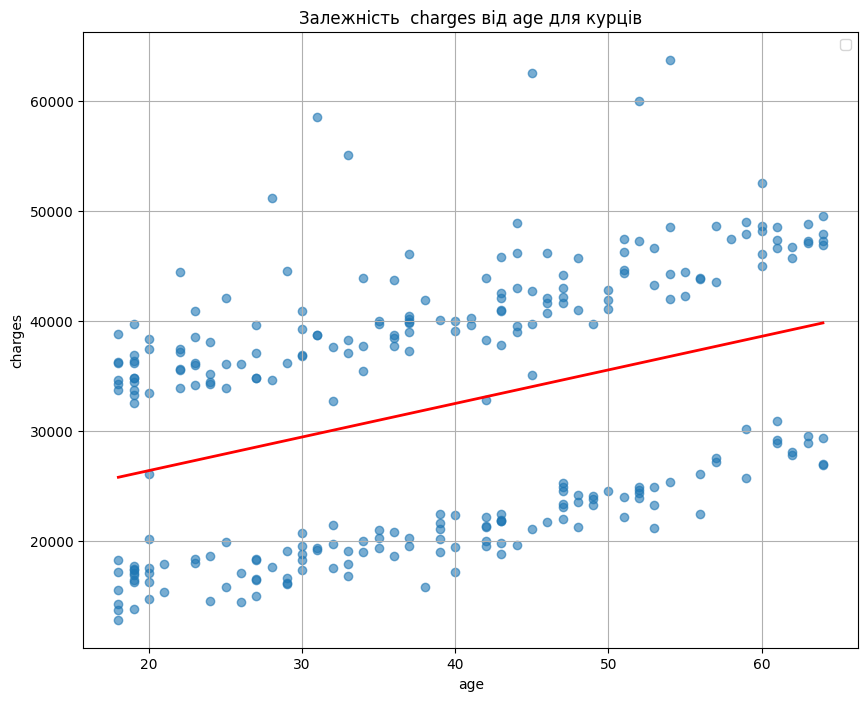

In [52]:
# Графік
idx = np.argsort(X.values.flatten())
X_sorted = X.values[idx]
y_pred_sorted = y_predict[idx]
plt.figure(figsize=(10,8))
plt.scatter(X, y, alpha=0.6)
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2)
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Залежність  charges від age для курців")
plt.grid(True)
plt.show()

Згідно даних точність моделі r2 = 0,136, що говорить про те що модель не є надто якісна. Швидше за все будувати припущення лише за однією змінною age є не зовсім правильно, можемо припустити що для покращення моделі потрібно додати ще декілька змінних в обрахунок. Отже модель потребує доопрацювання, не варто її використовувати в компанії